In [38]:
import xarray as xr
import numpy as np
import pandas as pd

## Plot significant wave height

In [39]:
hs_data = pd.read_csv('./HS_stations.dat', header=None, sep='\s+', encoding="utf-16")
hs_data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\byy\AppData\Local\Temp\ipykernel_10372\3079261454.py:1: SyntaxWarning: invalid escape sequence '\s'
  hs_data = pd.read_csv('./HS_stations.dat', header=None, sep='\s+', encoding="utf-16")


,0,1,2,3,4,5,6,7,8,9
0,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.00,0.084
1,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.25,0.172
2,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.50,0.226
3,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.75,0.268
4,Point,1,-,Mesh,Water,Surface,Elevation,(63),1.00,0.292
...,...,...,...,...,...,...,...,...,...,...
1543,Point,5,-,Mesh,Water,Surface,Elevation,(63),95.50,0.235
1544,Point,5,-,Mesh,Water,Surface,Elevation,(63),95.75,0.227
1545,Point,5,-,Mesh,Water,Surface,Elevation,(63),96.00,0.221
1546,Point,5,-,Mesh,Water,Surface,Elevation,(63),96.25,0.214


In [40]:
hs_data.columns = ['str1', 'Point', 'str2', 'str3', 'str4', 'str5', 'str6', 'str7', 'Time', 'Hs']
hs_data

,str1,Point,str2,str3,str4,str5,str6,str7,Time,Hs
0,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.00,0.084
1,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.25,0.172
2,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.50,0.226
3,Point,1,-,Mesh,Water,Surface,Elevation,(63),0.75,0.268
4,Point,1,-,Mesh,Water,Surface,Elevation,(63),1.00,0.292
...,...,...,...,...,...,...,...,...,...,...
1543,Point,5,-,Mesh,Water,Surface,Elevation,(63),95.50,0.235
1544,Point,5,-,Mesh,Water,Surface,Elevation,(63),95.75,0.227
1545,Point,5,-,Mesh,Water,Surface,Elevation,(63),96.00,0.221
1546,Point,5,-,Mesh,Water,Surface,Elevation,(63),96.25,0.214


In [41]:
p1_data = hs_data[hs_data.Point==1]
p1_data

p2_data = hs_data[hs_data.Point==3]
p3_data = hs_data[hs_data.Point==4]
p4_data = hs_data[hs_data.Point==5]

In [42]:
len(p1_data)

387

In [43]:
time_stamps = pd.date_range(start='2019-10-29 23:15:00', end='2019-11-2 23:45:00', freq="15min")
len(time_stamps)

387

<Figure size 3840x2880 with 0 Axes>

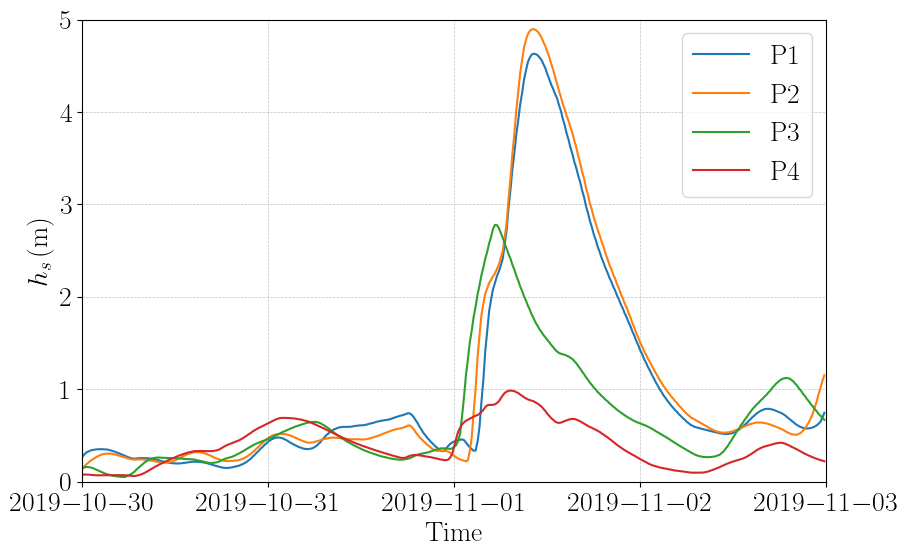

In [44]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmocean

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

plt.tight_layout()
fig, ax = plt.subplots(figsize = (9.6, 6))
ax.plot(time_stamps, p1_data['Hs'], linewidth = 1.5, label="P1")
ax.plot(time_stamps, p2_data['Hs'], linewidth = 1.5, label="P2")
ax.plot(time_stamps, p3_data['Hs']*1.025, linewidth = 1.5, label="P3")
ax.plot(time_stamps, p4_data['Hs']*1.05, linewidth = 1.5, label="P4")
plt.legend(loc='best')

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
ax.set_ylim([0, 5.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$h_s$\,{\rm (m)}')

fig.savefig("hs_stations-p1-p4", dpi=480)

## Plot water level

In [45]:
eta_data_swan = pd.read_csv('./fort.61', skiprows=2, header=None, sep='\s+')
eta_data_swan

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\byy\AppData\Local\Temp\ipykernel_10372\2502650904.py:1: SyntaxWarning: invalid escape sequence '\s'
  eta_data_swan = pd.read_csv('./fort.61', skiprows=2, header=None, sep='\s+')


,0,1
0,300.0,150.000000
1,1.0,-0.000022
2,2.0,0.000064
3,3.0,-0.000062
4,4.0,0.000096
...,...,...
10462,4.0,0.061992
10463,5.0,0.026773
10464,6.0,0.041786
10465,7.0,0.105781


In [46]:
eta_data_swan.columns = ['Stations', 'Eta']

In [47]:
p5_eta_data = eta_data_swan[eta_data_swan.Stations==5]
p7_eta_data  = eta_data_swan[eta_data_swan.Stations==6]
p12_eta_data  = eta_data_swan[eta_data_swan.Stations==7]
p13_eta_data  = eta_data_swan[eta_data_swan.Stations==8]

In [48]:
len(p7_eta_data)

1163

In [49]:
time_stamps = pd.date_range(start='2019-10-29 23:0:05', end='2019-11-2 23:55:00', freq="5min")
len(time_stamps)

1163

<Figure size 3840x2880 with 0 Axes>

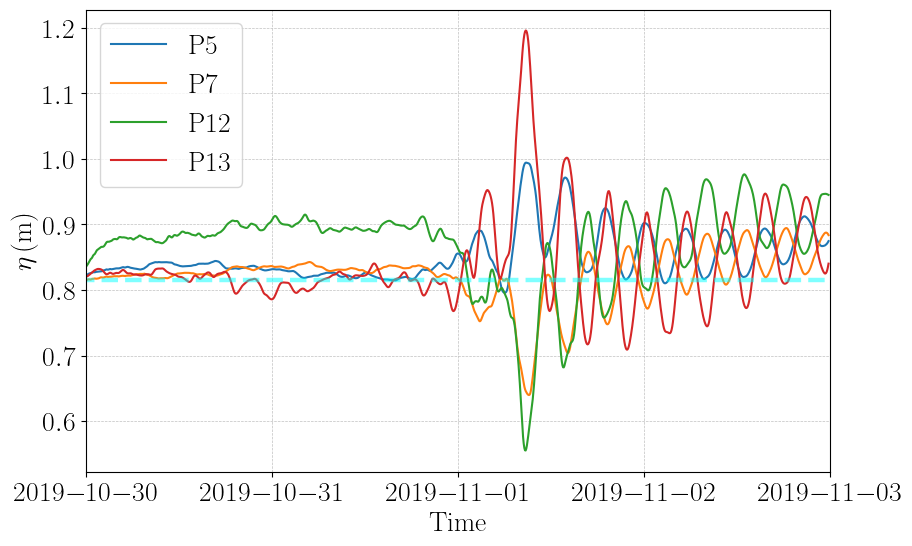

In [54]:
mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

plt.tight_layout()
fig, ax = plt.subplots(figsize = (9.6, 6))
datum = 0.815
ax.plot(time_stamps, p5_eta_data['Eta']*1.02+datum, linewidth = 1.5, label="P5")
ax.plot(time_stamps, p7_eta_data['Eta']+datum, linewidth = 1.5, label="P7")
ax.plot(time_stamps, p12_eta_data['Eta']+datum, linewidth = 1.5, label="P12")
ax.plot(time_stamps, p13_eta_data['Eta']+datum, linewidth = 1.5, label="P13")
plt.legend(loc='best')

ax.plot([time_stamps[0], time_stamps[-1]], [datum, datum], linewidth = 3.2, linestyle='--', color="cyan", alpha=0.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
# ax.set_ylim([0, 5.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$\eta$\,{\rm (m)}')

fig.savefig("eta_stations-p5-p13", dpi=480)

### Plot eta for 2D, no SWAN

In [61]:
eta_data_2D = pd.read_csv(r'../2D_noSWAN_noWD/reg/fort.61', skiprows=2, header=None, sep='\s+')
eta_data_2D

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\byy\AppData\Local\Temp\ipykernel_10372\1223850330.py:1: SyntaxWarning: invalid escape sequence '\s'
  eta_data_2D = pd.read_csv(r'../2D_noSWAN_noWD/reg/fort.61', skiprows=2, header=None, sep='\s+')


,0,1
0,300.0,150.000000
1,1.0,-0.000025
2,2.0,0.000057
3,3.0,-0.000057
4,4.0,0.000089
...,...,...
10462,4.0,0.086742
10463,5.0,0.058468
10464,6.0,0.068780
10465,7.0,0.130108


In [62]:
eta_data_2D.columns = ['Stations', 'Eta']

p5_eta_data_2D = eta_data_2D[eta_data_2D.Stations==5]
p7_eta_data_2D  = eta_data_2D[eta_data_2D.Stations==6]
p12_eta_data_2D  = eta_data_2D[eta_data_2D.Stations==7]
p13_eta_data_2D  = eta_data_2D[eta_data_2D.Stations==8]

<Figure size 3840x2880 with 0 Axes>

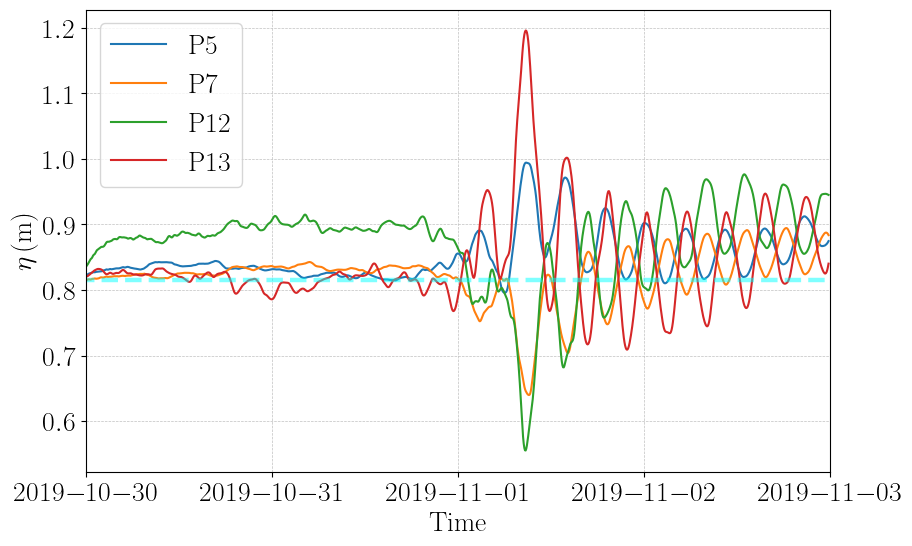

In [69]:
mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

plt.tight_layout()
fig, ax = plt.subplots(figsize = (9.6, 6))
datum = 0.815
ax.plot(time_stamps, p5_eta_data_2D['Eta']*1.02+datum, linewidth = 1.5, label="P5")
ax.plot(time_stamps, p7_eta_data_2D['Eta']+datum, linewidth = 1.5, label="P7")
ax.plot(time_stamps, p12_eta_data_2D['Eta']+datum, linewidth = 1.5, label="P12")
ax.plot(time_stamps, p13_eta_data_2D['Eta']+datum, linewidth = 1.5, label="P13")
plt.legend(loc='best')

ax.plot([time_stamps[0], time_stamps[-1]], [datum, datum], linewidth = 3.2, linestyle='--', color="cyan", alpha=0.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
# ax.set_ylim([0, 5.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$\eta$\,{\rm (m)}')

fig.savefig("../2D_noSWAN_noWD/reg/eta_stations-p5-p13", dpi=480)

<Figure size 640x480 with 0 Axes>

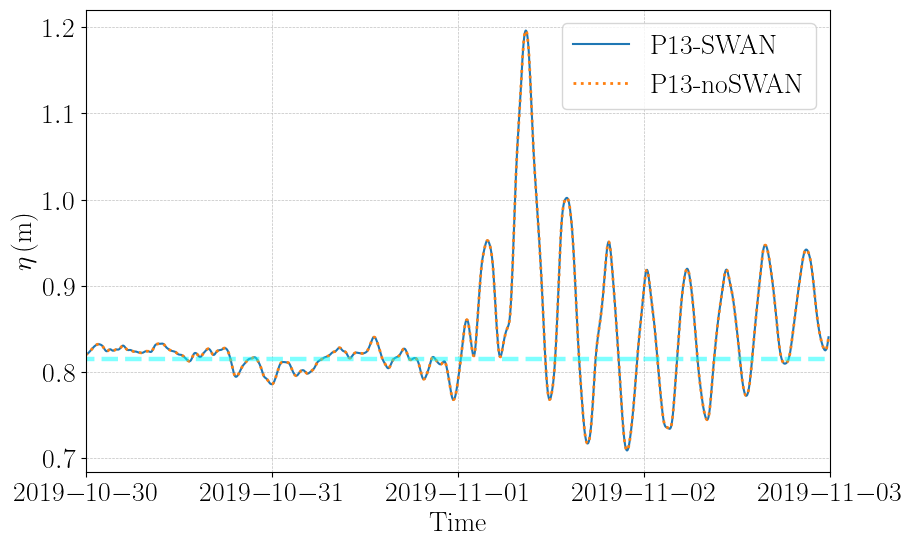

In [70]:
# Compare P12
plt.tight_layout()
fig, ax = plt.subplots(figsize = (9.6, 6))
datum = 0.815
ax.plot(time_stamps, p13_eta_data['Eta']+datum, linewidth = 1.5, label="P13-SWAN")
ax.plot(time_stamps, p13_eta_data_2D['Eta']+datum, linewidth = 2, label="P13-noSWAN", linestyle='dotted')
plt.legend(loc='best')

ax.plot([time_stamps[0], time_stamps[-1]], [datum, datum], linewidth = 3.2, linestyle='--', color="cyan", alpha=0.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
# ax.set_ylim([0, 5.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$\eta$\,{\rm (m)}')

fig.savefig("./p13_comp", dpi=480)